In [17]:
from sklearn.metrics import confusion_matrix
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as  sn
from sklearn.model_selection import train_test_split

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
from adult import dataframes_adult,train_test_dataset
df = pd.read_csv('../data/adult/adult.data', header=None)
df_test = pd.read_csv('../data/adult/adult.test', skiprows=1, header=None)

df,df_test = dataframes_adult(df,df_test)
df.head(2)
df_test.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital - gain,capital - loss,hours - per - week,native - country,salary
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.


In [19]:
X_train, X_test, y_train, y_test = train_test_dataset(df, df_test)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(32561, 107) (16281, 107)
(32561,) (16281,)


In [20]:
plt.figure(figsize = (24,20))
# sn.heatmap(df.corr())

<Figure size 1728x1440 with 0 Axes>

<Figure size 1728x1440 with 0 Axes>

0.814262023217247


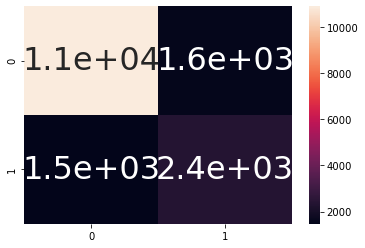

In [21]:
from sklearn.tree import DecisionTreeClassifier

dtc_ = DecisionTreeClassifier(criterion='entropy')
dtc_.fit(X_train, y_train)
sn.heatmap(confusion_matrix(y_test, dtc_.predict(X_test)), annot=True, annot_kws={"size": 32})
print(dtc_.score(X_test, y_test))

0.8183772495546957


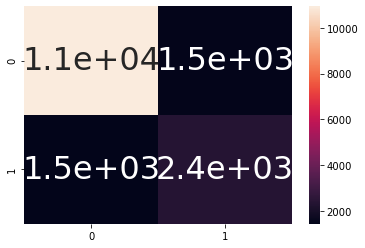

In [22]:
from models.decisiontree import DecisionTree
dtc = DecisionTree()
dtc.fit(X_train, y_train)
sn.heatmap(confusion_matrix(y_test, dtc.predict(X_test)), annot=True, annot_kws={"size": 32})
print(dtc.score(X_test, y_test))

0.8540015969535041


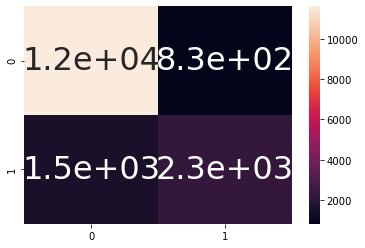

In [25]:
D=1
K=20

from sklearn.ensemble import AdaBoostClassifier
model_=AdaBoostClassifier(n_estimators=K, base_estimator=DecisionTreeClassifier(criterion='entropy', max_depth=1))
model_.fit(X_train, y_train)
sn.heatmap(confusion_matrix(y_test, model_.predict(X_test)), annot=True, annot_kws={"size": 32})
print(model_.score(X_test, y_test))

fitting 20 models
0.847613782937166


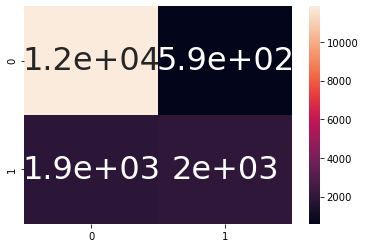

In [26]:
from models.adaboost import AdaBoost
model=AdaBoost(n_estimators=K, base_estimator=DecisionTree(max_depth=1))
model.fit(X_train, y_train)
sn.heatmap(confusion_matrix(y_test, model.predict(X_test)), annot=True, annot_kws={"size": 32})
print(model.score(X_test, y_test))
